Read in one of Paul Lightsey's stray light susceptibility maps and plot it for the paper.  Oct 2022 jrigby

In [77]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import numpy as np
from astropy.table import Table
import cartopy.crs as ccrs

In [78]:
straylight_dir = '/Users/jrrigby1/SCIENCE/JWST_Data/Prelaunch_JWST_Backgrounds/Stray_light/'
sus_map = straylight_dir + 'stray_light_RTF_maps_hacked_for_machineread.xlsx'

In [79]:
df = pandas.read_excel(sus_map, sheet_name='2um RTF')
df.set_index('coelevation_angle', inplace=True)
# column headers are azimuth angle
df.head()

,-178.5,-175.5,-172.5,-169.5,-166.5,-163.5,-160.5,-157.5,-154.5,-151.5,...,151.5,154.5,157.5,160.5,163.5,166.5,169.5,172.5,175.5,178.5
coelevation_angle,,,,,,,,,,,,,,,,,,,,,
1.5,0.000133,0.000132,0.000132,0.000133,0.000132,0.000131,0.000131,0.000131,0.000131,0.000130,...,0.000161,0.000159,0.000156,0.000152,0.000149,0.000147,0.000144,0.000142,0.000139,0.000136
4.5,0.000050,0.000051,0.000051,0.000052,0.000053,0.000053,0.000052,0.000052,0.000051,0.000052,...,0.000056,0.000055,0.000055,0.000055,0.000051,0.000051,0.000050,0.000050,0.000050,0.000050
7.5,0.000068,0.000068,0.000067,0.000066,0.000067,0.000070,0.000071,0.000065,0.000059,0.000054,...,0.000035,0.000037,0.000039,0.000045,0.000051,0.000056,0.000061,0.000060,0.000062,0.000066
10.5,0.000048,0.000052,0.000055,0.000059,0.000060,0.000053,0.000047,0.000040,0.000034,0.000032,...,0.000029,0.000031,0.000031,0.000030,0.000031,0.000033,0.000035,0.000040,0.000043,0.000045
13.5,0.000095,0.000094,0.000096,0.000025,0.000024,0.000024,0.000022,0.000020,0.000020,0.000020,...,0.000021,0.000021,0.000022,0.000022,0.000022,0.000020,0.000021,0.000022,0.000023,0.000096


In [80]:
lat = df.index.values
lon = df.columns.values
lat, long  # Now go use these to plot in coordinates!

(array([  1.5,   4.5,   7.5,  10.5,  13.5,  16.5,  19.5,  22.5,  25.5,
         28.5,  31.5,  34.5,  37.5,  40.5,  43.5,  46.5,  49.5,  52.5,
         55.5,  58.5,  61.5,  64.5,  67.5,  70.5,  73.5,  76.5,  79.5,
         82.5,  85.5,  88.5,  91.5,  94.5,  97.5, 100.5, 103.5, 106.5,
        109.5, 112.5, 115.5, 118.5, 121.5, 124.5, 127.5, 130.5, 133.5,
        136.5, 139.5, 142.5, 145.5, 148.5, 151.5, 154.5, 157.5, 160.5,
        163.5, 166.5, 169.5, 172.5, 175.5, 178.5]),
 array([-178.5, -175.5, -172.5, -169.5, -166.5, -163.5, -160.5, -157.5,
        -154.5, -151.5, -148.5, -145.5, -142.5, -139.5, -136.5, -133.5,
        -130.5, -127.5, -124.5, -121.5, -118.5, -115.5, -112.5, -109.5,
        -106.5, -103.5, -100.5, -97.5, -94.5, -91.5, -88.5, -85.5, -82.5,
        -79.5, -76.5, -73.5, -70.5, -67.5, -64.5, -61.5, -58.5, -55.5,
        -52.5, -49.5, -46.5, -43.5, -40.5, -37.5, -34.5, -31.5, -28.5,
        -25.5, -22.5, -19.5, -16.5, -13.5, -10.5, -7.5, -4.5, -1.5, 1.5,
        4.5, 7.5,

In [81]:
#df2 = pandas.read_excel(sus_map, sheet_name='2um RTF', usecols=np.arange(1,120))
#df2.columns = df2.columns.astype(str)
#astropy_table = Table.from_pandas(df2)
#astropy_table[0:4]

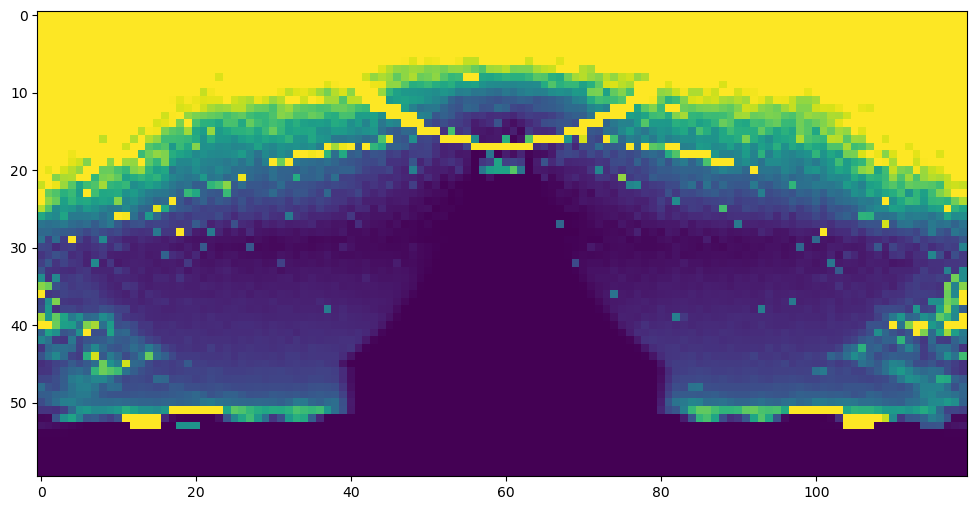

In [82]:
# Origin is at top left, same as the excel spreadsheet, backwards from ds9
plt.rcParams['figure.figsize'] = (12, 10)
plt.imshow(df, vmin=1E-8, vmax=1E-5, origin='upper')
numpyformat = df.to_numpy()
fits.writeto(straylight_dir + 'rtf_2um.fits', numpyformat, overwrite=True)

In [83]:
# Go read the output fits file into ds9 and plot it sensibly

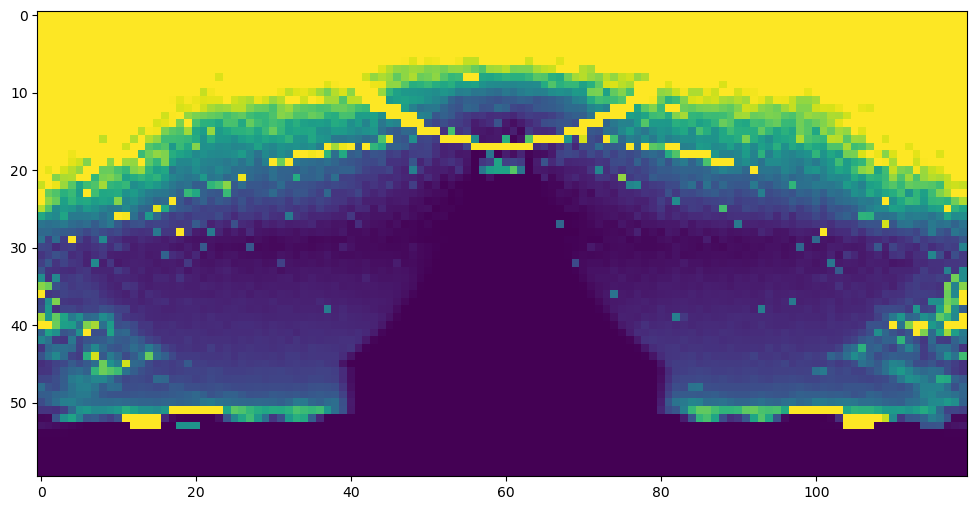

In [84]:
plt.imshow(numpyformat, vmin=1E-8, vmax=1E-5, origin='upper')

flux in top, flux in all, ratio


(0.058021491744187775, 0.09003692459464442, 0.6444188537692347)

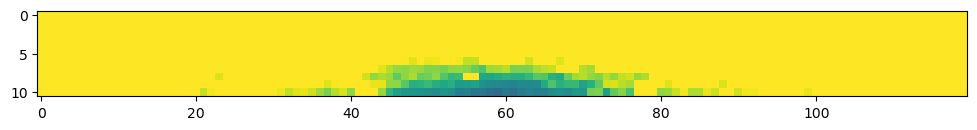

In [85]:
y1=0 ; y2=11; 
subset = numpyformat[y1 : y2, :]
plt.imshow(subset, vmin=1E-8, vmax=1E-5, origin='upper')
print("flux in top, flux in all, ratio")
subset.sum(), numpyformat.sum(),   subset.sum() / numpyformat.sum()
# This is consistent w Paul saying that most of the light is win 35 degrees of the boresight

In [86]:
# Try projection="mollweide") in cartopy 
# https://scitools.org.uk/cartopy/docs/v0.16/matplotlib/advanced_plotting.html

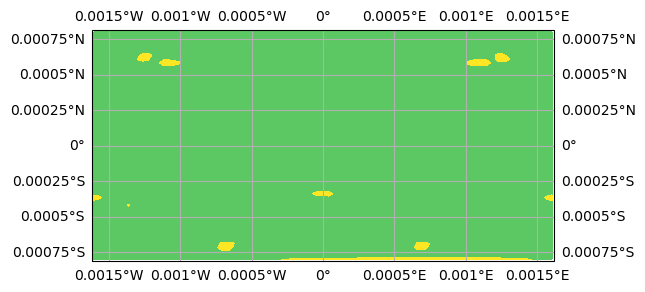

In [142]:
transform = ccrs.Mercator()
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=transform)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat -90, numpyformat, transform=transform, vmin=1E-8, vmax=1E-4) #norm=log
ax.set_extent([-180, 180, -90, 90], crs=transform)
ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree())
plt.show()

In [105]:
lat, long

(array([  1.5,   4.5,   7.5,  10.5,  13.5,  16.5,  19.5,  22.5,  25.5,
         28.5,  31.5,  34.5,  37.5,  40.5,  43.5,  46.5,  49.5,  52.5,
         55.5,  58.5,  61.5,  64.5,  67.5,  70.5,  73.5,  76.5,  79.5,
         82.5,  85.5,  88.5,  91.5,  94.5,  97.5, 100.5, 103.5, 106.5,
        109.5, 112.5, 115.5, 118.5, 121.5, 124.5, 127.5, 130.5, 133.5,
        136.5, 139.5, 142.5, 145.5, 148.5, 151.5, 154.5, 157.5, 160.5,
        163.5, 166.5, 169.5, 172.5, 175.5, 178.5]),
 array([-178.5, -175.5, -172.5, -169.5, -166.5, -163.5, -160.5, -157.5,
        -154.5, -151.5, -148.5, -145.5, -142.5, -139.5, -136.5, -133.5,
        -130.5, -127.5, -124.5, -121.5, -118.5, -115.5, -112.5, -109.5,
        -106.5, -103.5, -100.5, -97.5, -94.5, -91.5, -88.5, -85.5, -82.5,
        -79.5, -76.5, -73.5, -70.5, -67.5, -64.5, -61.5, -58.5, -55.5,
        -52.5, -49.5, -46.5, -43.5, -40.5, -37.5, -34.5, -31.5, -28.5,
        -25.5, -22.5, -19.5, -16.5, -13.5, -10.5, -7.5, -4.5, -1.5, 1.5,
        4.5, 7.5,

In [ ]:
projection = ccrs.Mercator() #want Mollweide()
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()

ax.plot(lon, lat, numpyformat, transform=ccrs.Mercator())  
plt.show()


In [ ]:
lon.shape, lat.shape, numpyformat.shape, 

In [ ]:
lon[0:3], lat[0:3]

In [ ]:
type(numpyformat)